In [2]:

import matplotlib.pyplot as plt

# sudo pip install mcareader
import mcareader as mca
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy import optimize


In [3]:
# physics constant
alpha=1/137
m_e=9.10938356e-31 #kg
k=1.38e-23
C=299792458 #m/s 
Eme=m_e*C**2
h= 6.62607015e-34
keV=1e3*1.60217662e-19 #J

In [4]:
# variable
thita=np.arange(0,175)  #degree
thita=thita/180*np.pi


In [5]:
Ein=500*keV
Eout= 169.40016389*keV

# Eout= Ein/(1 + (Ein/(m_e*C**2)*(1-np.cos(thita))) )
alpha=np.arccos(1- ((Ein/Eout) - 1 )/(Ein/(m_e*C**2) ))
alpha=alpha / np.pi*180
alpha
# Eout/keV

173.99999996343018

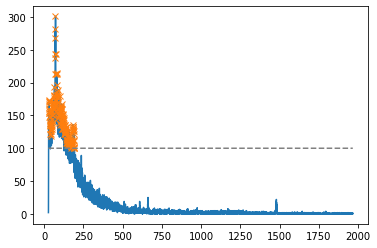

In [7]:
s1 = mca.Mca("BACGROUND_DETECTOR1.MCA")
x, y = s1.get_points(calibration_method="interpolation")

# x[y>100]
height_peak=100
peaks, _ = find_peaks(y, height=height_peak)
plt.plot(x,y)
plt.plot(x[peaks], y[peaks], "x")
plt.plot(x,np.zeros_like(y)+height_peak, "--", color="gray")
plt.show()


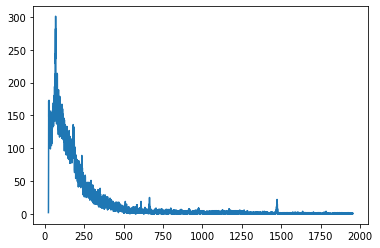

In [8]:
s1 = mca.Mca("BACGROUND_DETECTOR2.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

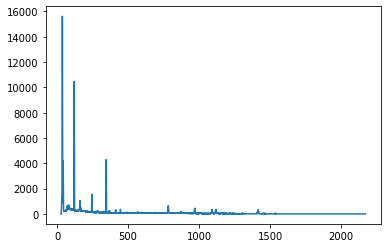

In [11]:
s1 = mca.Mca("CALIBRATION_DETECTOR1.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

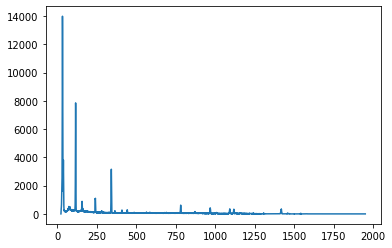

In [12]:
s1 = mca.Mca("CALIBRATION_DETECTOR2.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

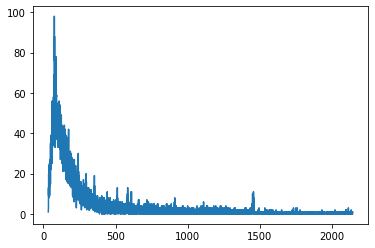

In [13]:
s1 = mca.Mca("G1_BACKGROUND_CS.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

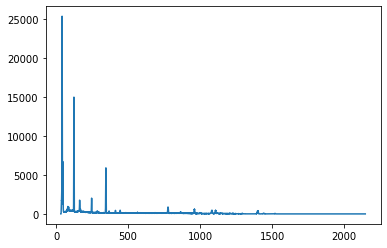

In [14]:
s1 = mca.Mca("G1_EU152_POSTCALIBRATION.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

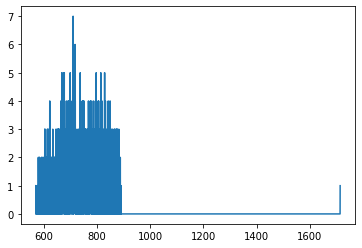

In [15]:
s1 = mca.Mca("G1_G2_TAC_sca.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

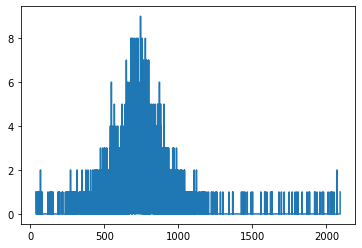

In [16]:
s1 = mca.Mca("G1_G2_TAC.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

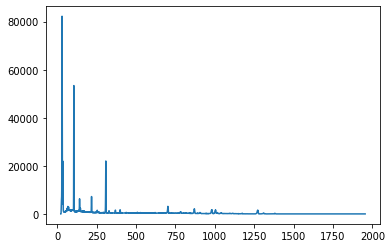

In [17]:
s1 = mca.Mca("G1_SCA_CALIBRATION.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

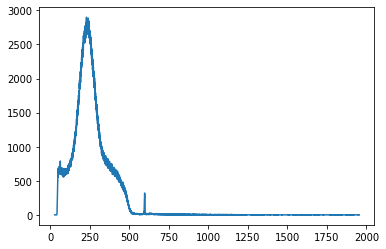

In [18]:
s1 = mca.Mca("G1_SCA_GATED_2.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

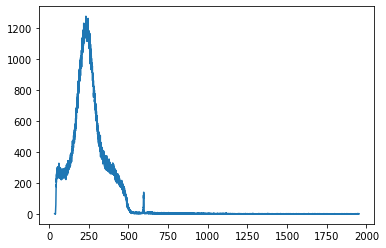

In [19]:
s1 = mca.Mca("G1_SCA_GATED.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

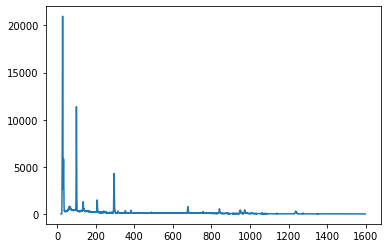

In [20]:
s1 = mca.Mca("G2_SCA_CALIBRATION.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

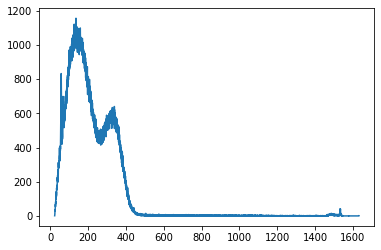

In [21]:
s1 = mca.Mca("G2_SCA_GATED_2.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

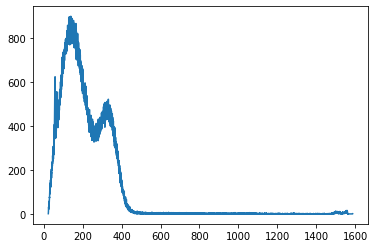

In [22]:
s1 = mca.Mca("G2_SCA_GATED.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

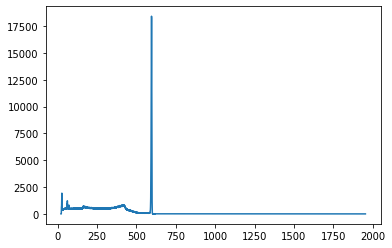

In [23]:
s1 = mca.Mca("SINGLES_DETECTOR1.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

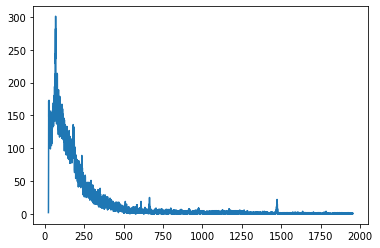

In [24]:
s1 = mca.Mca("SINGLES_DETECTOR2.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

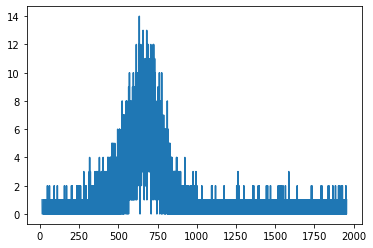

In [25]:
s1 = mca.Mca("TAC_SPECTRUM.MCA")
x, y = s1.get_points(calibration_method="interpolation")
s1.plot()

##### The decay of 152Eu leads to γ-rays from 100keV to 1500 keV. to calibrate  The energies of the gamma-rays of interest are:
121.77 , 344.28 , 778.9 , 1408.01 keV


In [121]:
x[peaks]

array([ 38.07772926,  38.61441048,  39.68777293,  40.76113537,
        41.83449782,  46.39628821,  52.03144105,  52.83646288,
        53.64148472, 139.51048035, 140.04716157, 278.51091703,
       279.31593886, 279.85262009, 391.48231441, 392.01899563,
       392.55567686])

##### here we can see, the x data are which is aligned by software is not exactly correct, so I align it again by python

In [119]:
# y.max()
# x[np.argmax(y)]
x_data=np.array([139.51048035,392.01899563])
y_data=np.array([121.8,344.28])

def test_func(x, a, b):
    return a + b * x

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)


[-1.11978207  0.8810792 ]


In [125]:
a=params[0]
b=params[1]
x_aligned = a + b * x

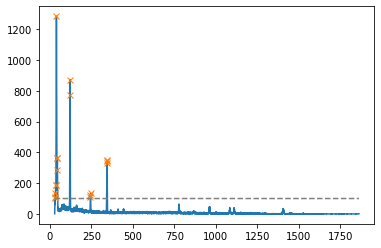

In [126]:
height_peak=100
peaks, _ = find_peaks(y, height=height_peak)
plt.plot(x_aligned,y)
plt.plot(x_aligned[peaks], y[peaks], "x")
plt.plot(x_aligned,np.zeros_like(y)+height_peak, "--", color="gray")
plt.show()

In [127]:
x_aligned[peaks]

array([ 32.42971307,  32.90257173,  33.84828905,  34.79400637,
        35.7397237 ,  39.75902231,  44.72403826,  45.43332625,
        46.14261424, 121.8       , 122.27285866, 244.2703932 ,
       244.97968119, 245.45253985, 343.80714134, 344.28      ,
       344.75285866])

array([1, 2])

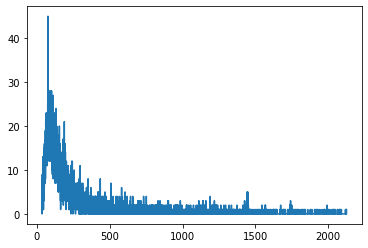

In [25]:
s2 = mca.Mca("ENERGY_SPECTRUM_D1_BACKGROUND.MCA")
s2.plot()

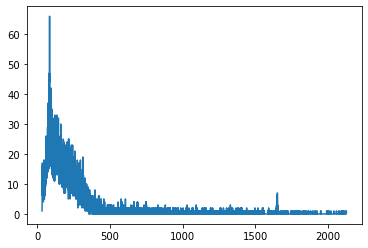

In [114]:
s5 = mca.Mca("ENERGY_SPECTRUM_D2_P1.MCA")
s5.plot()

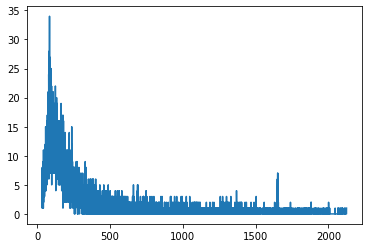

In [115]:
s4 = mca.Mca("ENERGY_SPECTRUM_D2_background.MCA")
s4.plot()

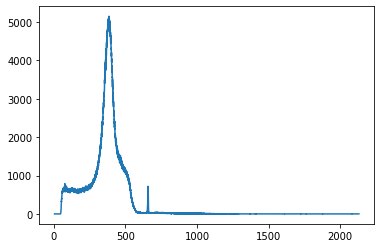

In [29]:
s6 = mca.Mca("G1_TAC_GATED.MCA")
s6.plot()

##### A single 137Cs decay emits a single γ-ray at 661.66 keV. to investigate Compton scattering


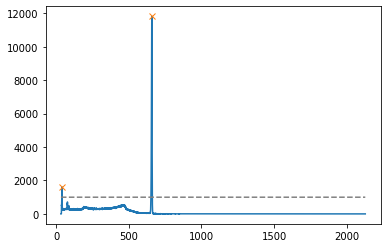

In [129]:
s3 = mca.Mca("energy_spectrum_d1_p1.MCA")
x3, y3 = s3.get_points(calibration_method="interpolation")

# x[y>100]
height_peak=1000
peaks, _ = find_peaks(y3, height=height_peak)
plt.plot(x3,y3)
plt.plot(x3[peaks], y3[peaks], "x")
plt.plot(x3,np.zeros_like(y3)+height_peak, "--", color="gray")
plt.show()

In [130]:
x3[peaks]

array([ 38.07772926, 657.40786026])